### CMPE462 (Machine Learning) | Homework 2 | Cemal Burak Aygün (2014400072)

In [1]:
# Allowed Libraries
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Dimensionality Reduction

In [2]:
FIGURE_SIZE = (16, 9)  # Size of the plots

# A: Creating Datasets
Steps:
* Generate 500 points from $\frac{x^2}{2^2}+ \frac{y^2}{5^2} \le 1$ (From ellipse with 2, 5 radius on the x and y axes respectively). Example way:
    - Generate 500 angle values $\{\theta^t\}$ in range $[-\pi,+\pi]$
    - Generate 500 values $\{r^t\}$ in range $[0,1]$
    - Generate 500 points $\{x^t,y^t\}$ where $x^t = 2r^tsin(\theta^t)$ and $y^t = 5r^tcos(\theta^t)$.
* Generate 3 set of labels. Do it by dividing data using following Lines (eg. one side of line is label 0, other side is label 1)
    - $y=0$ line
    - $x=0$ line 
    - $y=3x +1$ line 
* Visualize points with each set of labels in subplots with 1 row, 3 columns where each column corresponds to one set of labels. (Use different colors for each label.)  

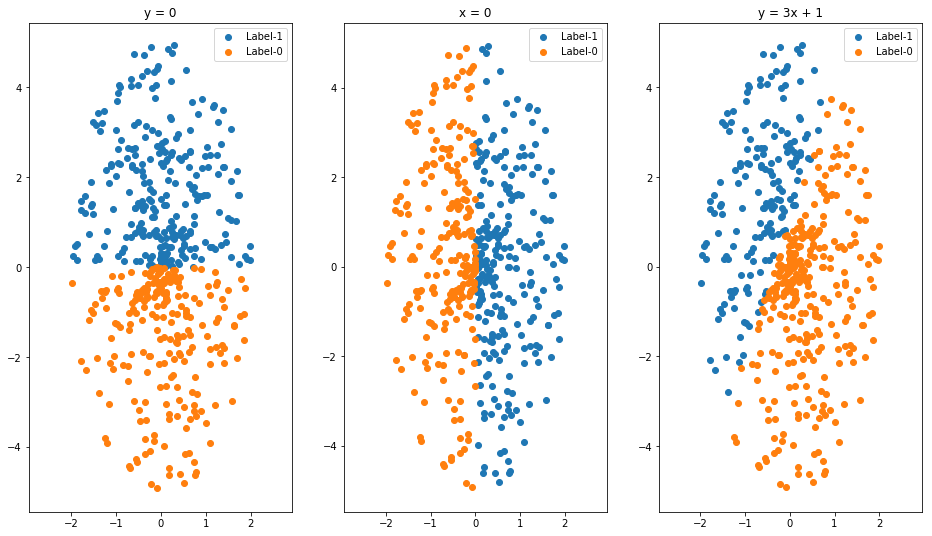

In [3]:
DATA_SIZE = 500  # Number of data points

theta_values = np.random.uniform(low=-1*np.pi, high=np.pi, size=DATA_SIZE)  # [-PI, PI]
r_values = np.random.uniform(low=0, high=1, size=DATA_SIZE)  # [0, 1]

# (DATA_SIZEx2) matrix
# Each row is an instance (point), each column is a feature (x or y values)
DATA_MATRIX = np.array(
    [[2*r*np.sin(theta), 5*r*np.cos(theta)] for (r, theta) in zip(r_values, theta_values)]
)

Y_0_LABELS  = np.array([(1 if y >= 0 else 0) for (x, y) in DATA_MATRIX])  # y = 0 line
X_0_LABELS  = np.array([(1 if x >= 0 else 0) for (x, y) in DATA_MATRIX])  # x = 0 line
LINE_LABELS = np.array([(1 if y >= 3*x + 1 else 0) for (x, y) in DATA_MATRIX])  # y = 3x + 1 line

# A tuple of tuples which gathers label sets and corresponding titles together for plotting purposes.
LABEL_TITLE_TUPLES = ((Y_0_LABELS, 'y = 0'), (X_0_LABELS, 'x = 0'), (LINE_LABELS, 'y = 3x + 1'))

plt.figure(figsize=FIGURE_SIZE)
plot_index = 0  # Position of the current subplot

# Plots the figures for part (A)
for (label_set, title) in LABEL_TITLE_TUPLES:
    plot_index += 1

    plt.subplot(1, 3, plot_index)
    plt.title(title)
    l1 = plt.scatter(DATA_MATRIX[label_set == 1, 0], DATA_MATRIX[label_set == 1, 1])  # Label-1 data
    l0 = plt.scatter(DATA_MATRIX[label_set == 0, 0], DATA_MATRIX[label_set == 0, 1])  # Label-0 data
    plt.legend((l1, l0), ('Label-1', 'Label-0'))
    plt.axis('equal')
    
plt.show()

# B: Applying PCA
Steps:
* Write PCA function.
* Apply PCA to data you generated.
* Visualize each set of labels using first principle component. 
* Visualize each set of labels using second principle component. 

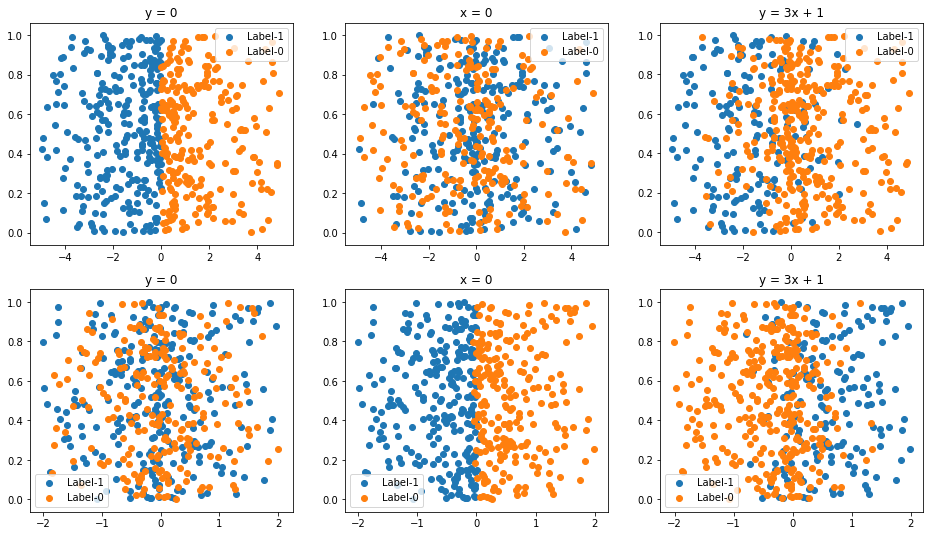

In [4]:
def pca(data_matrix, n_components):
    """
    Fits the model with given `data_matrix` and applies the dimensionality reduction on it.    

    Takes a 2-dimensional (n x d) numpy.ndarray object (data_matrix) where rows represent samples
    and columns represent features. `n_components` is the number of components to keep.

    Returns a transformed version of data_matrix; 2-dimensional (n x n_components) numpy.ndarray object
    where rows are the samples and columns are the components to keep.
    """
    cov_matrix = np.cov(data_matrix, rowvar=False)  # Covariance matrix
    eig_values, eig_vectors = np.linalg.eig(cov_matrix)  # Eigenvalues and Eigenvectors of the covariance matrix

    # A list of (Eigenvalue, Eigenvector) pairs
    eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

    eig_pairs.sort(reverse=True)  # Sorts `eig_pairs` according to the Eigenvalues in decreasing order.

    # Constructs a (d x n_components) matrix where columns are Eigenvectors.
    # pair[1] is an Eigenvector in (1 x d) format (d = data_matrix.shape[1])
    W_matrix = np.hstack(
        [pair[1].reshape(data_matrix.shape[1], 1) for pair in eig_pairs]
    )[:, list(range(n_components))]

    return data_matrix.dot(W_matrix)


PCA_DATA_MATRIX = pca(DATA_MATRIX, 2)  # Projects DATA_MATRIX onto principal components

# Plots are depicted over a 2D space rather than 1D in order to see overlapping labels.
random_Ys = np.random.random(DATA_SIZE)  # This array contains y-values of the 2D space.

plt.figure(figsize=FIGURE_SIZE)
plot_index = 0  # Position of the current subplot

# Plots the figures for part (B)
for principal_component in range(PCA_DATA_MATRIX.shape[1]):
    for (label_set, title) in LABEL_TITLE_TUPLES:
        plot_index += 1

        plt.subplot(2, 3, plot_index)
        plt.title(title)
        l1 = plt.scatter(PCA_DATA_MATRIX[label_set == 1, principal_component], random_Ys[label_set == 1])  # Label-1 data
        l0 = plt.scatter(PCA_DATA_MATRIX[label_set == 0, principal_component], random_Ys[label_set == 0])  # Label-0 data
        plt.legend((l1, l0), ('Label-1', 'Label-0'))
    
plt.show()

# C: Applying LDA
Steps:
* Apply LDA (https://scikit-learn.org/stable/modules/lda_qda.html) to data for each label set. You can use sklearn implementation.
* Visualize each set of labels using first component of corresponding LDA. 

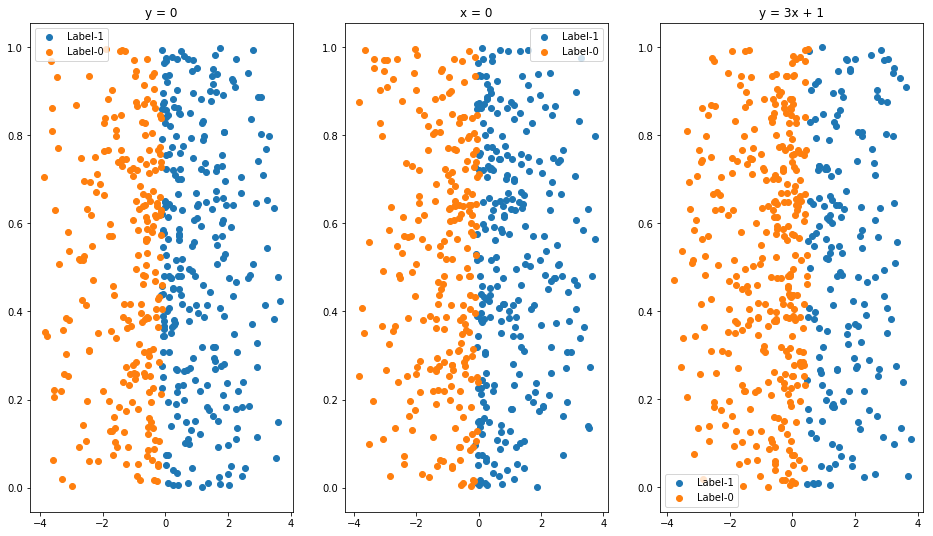

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

plt.figure(figsize=FIGURE_SIZE)
plot_index = 0  # Position of the current subplot

for (label_set, title) in LABEL_TITLE_TUPLES:
    plot_index += 1

    LDA_DATA_MATRIX = lda.fit_transform(DATA_MATRIX, label_set)

    plt.subplot(1, 3, plot_index)
    plt.title(title)
    l1 = plt.scatter(LDA_DATA_MATRIX[label_set == 1, 0], random_Ys[label_set == 1])  # Label-1 data
    l0 = plt.scatter(LDA_DATA_MATRIX[label_set == 0, 0], random_Ys[label_set == 0])  # Label-0 data
    plt.legend((l1, l0), ('Label-1', 'Label-0'))

plt.show()

# D: Nonlinear Data
Steps:
* Use generated data below.
* Apply PCA and LDA to this data, and visualize it (separately).

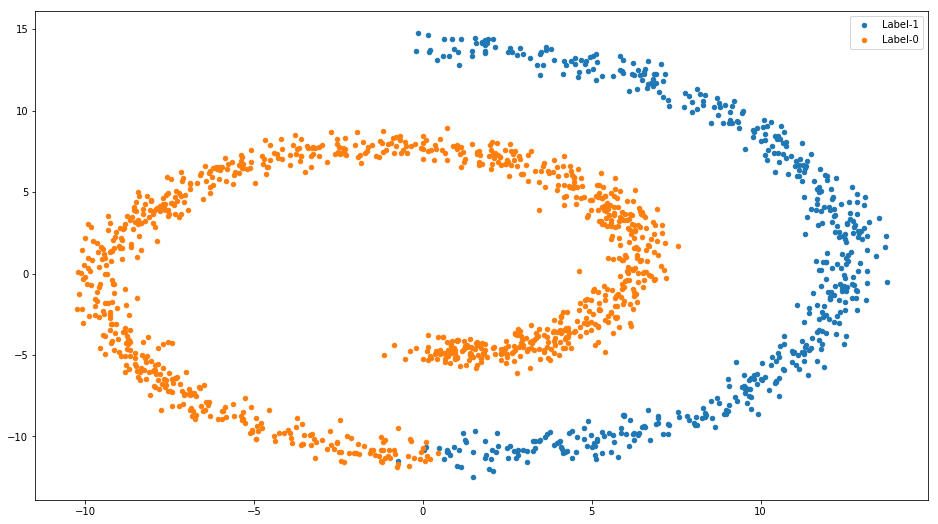

In [6]:
def genData():
    from sklearn.datasets import make_swiss_roll

    n_samples = 1500
    noise = 0.5
    X, t = make_swiss_roll(n_samples, noise)
    
    plt.figure(figsize=FIGURE_SIZE)
    
    # Make it thinner    
    Data = np.zeros([1500, 2])
    Data[:, 0] = X[:, 0]
    Data[:, 1] = X[:, 2]
    
    Labels = np.zeros([1500,])
    Labels[t > 11] = 1

    l1 = plt.scatter(Data[Labels == 1, 0], Data[Labels == 1, 1], s=20)  # Label-1 data
    l0 = plt.scatter(Data[Labels == 0, 0], Data[Labels == 0, 1], s=20)  # Label-0 data
    plt.legend((l1, l0), ('Label-1', 'Label-0'))
    
    return Data, Labels

Data, Labels = genData()

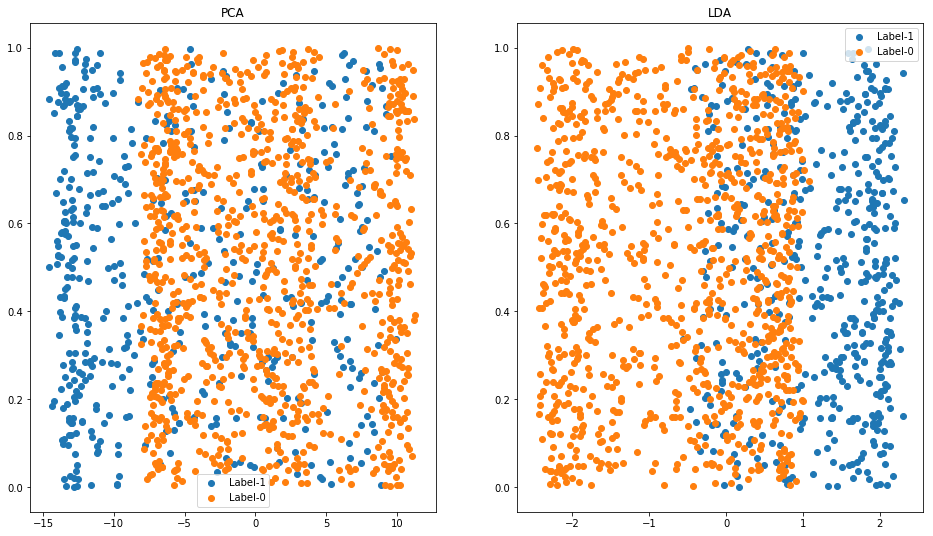

In [7]:
# Plots are depicted over a 2D space rather than 1D in order to see overlapping labels.
random_Ys = np.random.random(Data.shape[0])  # This array contains y-values of the 2D space.

pca_Data = pca(Data, n_components=1)
lda_Data = lda.fit_transform(Data, Labels)

plt.figure(figsize=FIGURE_SIZE)

plt.subplot(1, 2, 1)
plt.title('PCA')
l1 = plt.scatter(pca_Data[Labels == 1, 0], random_Ys[Labels == 1])  # Label-1 data
l0 = plt.scatter(pca_Data[Labels == 0, 0], random_Ys[Labels == 0])  # Label-0 data
plt.legend((l1, l0), ('Label-1', 'Label-0'))

plt.subplot(1, 2, 2)
plt.title('LDA')
l1 = plt.scatter(lda_Data[Labels == 1, 0], random_Ys[Labels == 1])
l0 = plt.scatter(lda_Data[Labels == 0, 0], random_Ys[Labels == 0])
plt.legend((l1, l0), ('Label-1', 'Label-0'))

plt.show()

# Part 2: Parametric and Non-Parametric Classification

Download points2d.dat from https://www.cmpe.boun.edu.tr/~emre/courses/cmpe462/material/hws/hw2/points2d.dat. The sample includes 6000 instances. Each instance is represented by a feature vector of 2 dimensions. The third column corresponds to the class (0/1/2) of the instance.

***
Variables and functions on the cell below are used in both 2A and 2B parts.

In [8]:
from sklearn.metrics import confusion_matrix


DATA_FILE_PATH = 'points2d.dat'
CLASSES = (0, 1, 2)  # Class labels of data points

TRAIN_DATA = []  # Training data set. List of instances, each instance is in the form [x, y, class]
VALID_DATA = []  # Validation data set. List of instances, each instance is in the form [x, y, class]
TEST_DATA = []   # Test data set. List of instances, each instance is in the form [x, y, class]


def get_prediction_error(predicted_classes, actual_classes):
    """
    Returns the prediction error between given `predicted_classes` and `actual_classes`.
    ith element of one parameter corresponds to the ith element of another parameter.
    :param predicted_classes: List, each element is a (predicted) class (label)
    :param actual_classes: List, each element is the actual class (label)
    """
    incorrect_num = sum([(0 if predicted_classes[i] == actual_classes[i] else 1) for i in range(len(actual_classes))])
    return incorrect_num / len(actual_classes)


def print_confusion_matrix(predicted_classes, actual_classes):
    print(f"Confusion Matrix: (First Row/Column: Class {CLASSES[0]}, Last Row/Column: Class {CLASSES[-1]})\n"
          f"{confusion_matrix(actual_classes, predicted_classes, CLASSES)}\n")

    
# Reads data file and constructs TRAIN_DATA, VALID_DATA and TEST_DATA
with open(DATA_FILE_PATH) as data_file:
    for line in data_file.readlines():
        if len(line.strip()) == 0:
            continue  # Skips empty lines.

        line_arr = line.split()
        instance = [float(line_arr[0]), float(line_arr[1]), int(line_arr[2])]  # [x, y, class]

        # Divides data amont TRAIN : VALIDATION : TEST sets with ratio 3 : 1 : 1
        rndm = np.random.random()
        if rndm < 0.6:
            TRAIN_DATA.append(instance)
        elif rndm < 0.8:
            VALID_DATA.append(instance)
        else:
            TEST_DATA.append(instance)

print(f"TRAIN_DATA size = {len(TRAIN_DATA)}\tVALID_DATA size = {len(VALID_DATA)}\tTEST_DATA size = {len(TEST_DATA)}\n")

TRAIN_DATA size = 3641	VALID_DATA size = 1216	TEST_DATA size = 1143



## A: Mixture of Gaussians

Steps:
* Implement mixture of gaussians.
* Divide data to training and validation and test sets.
* At training:
    - Divide all data to their respective classes.
    - Run mixture of gaussians with k=1,2,3 using different initial points (the general practice is to use k-means to initialize the means, you can use sklearn implementation of k-means). 
* At validation, select best model:
    - Using validation data, select best number of gaussians for each class using prediction error.
* On test set, report (for the best model):
    - the number of Gaussians for class 0, 1 and 2,
    - the prediction error, and
    - the confusion matrix.

***

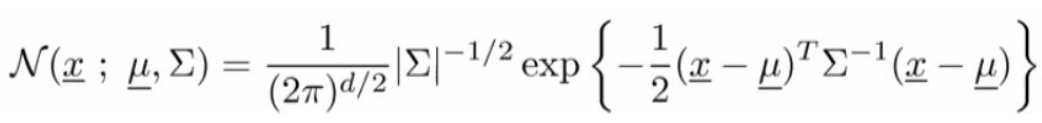
The function below implements this formula.

In [9]:
def multivariate_normal_pdf(x, u, S):
    """
    Returns the value of the pdf function of the multivariate normal distribution with mean `u` and
    covariance matrix `S` at given point `x`.
    :param x: [numpy.ndarray], a data point with multi-dimensions (1xd)
    :param u: [numpy.ndarray], same dimensions as x
    :param S: [numpy.ndarray], dxd covariance matrix
    """
    nominator = np.exp(-0.5 * np.dot(np.dot((x-u), np.linalg.inv(S)), (x-u).T))
    denomiator = np.sqrt(((2*np.pi)**x.shape[1]) * np.linalg.det(S))
    return float(nominator / denomiator)

***

| - | - |
| :- | :- |
| 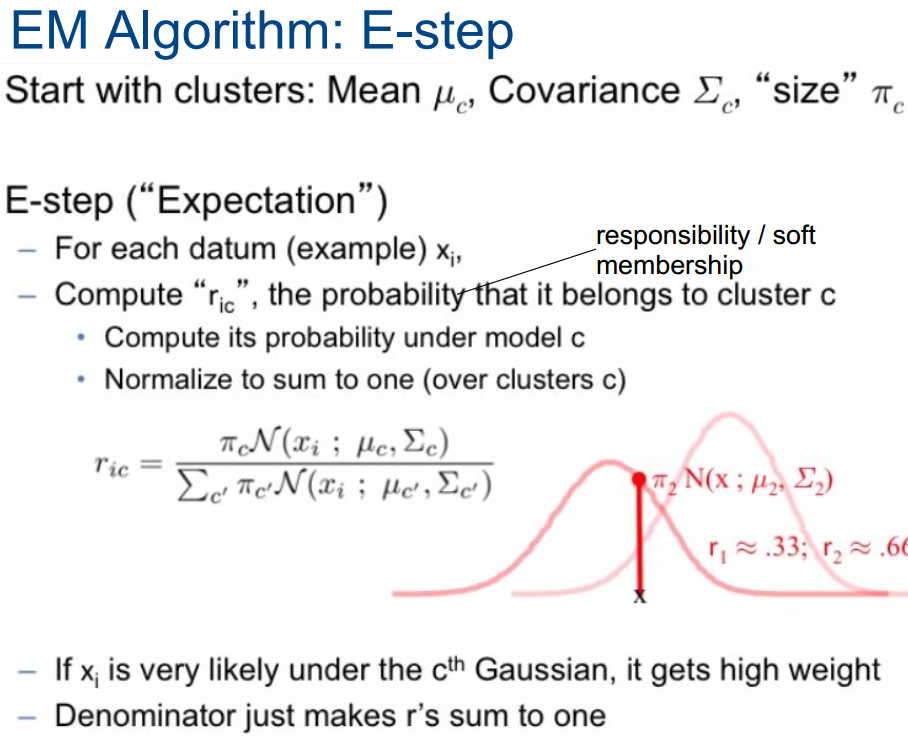 | 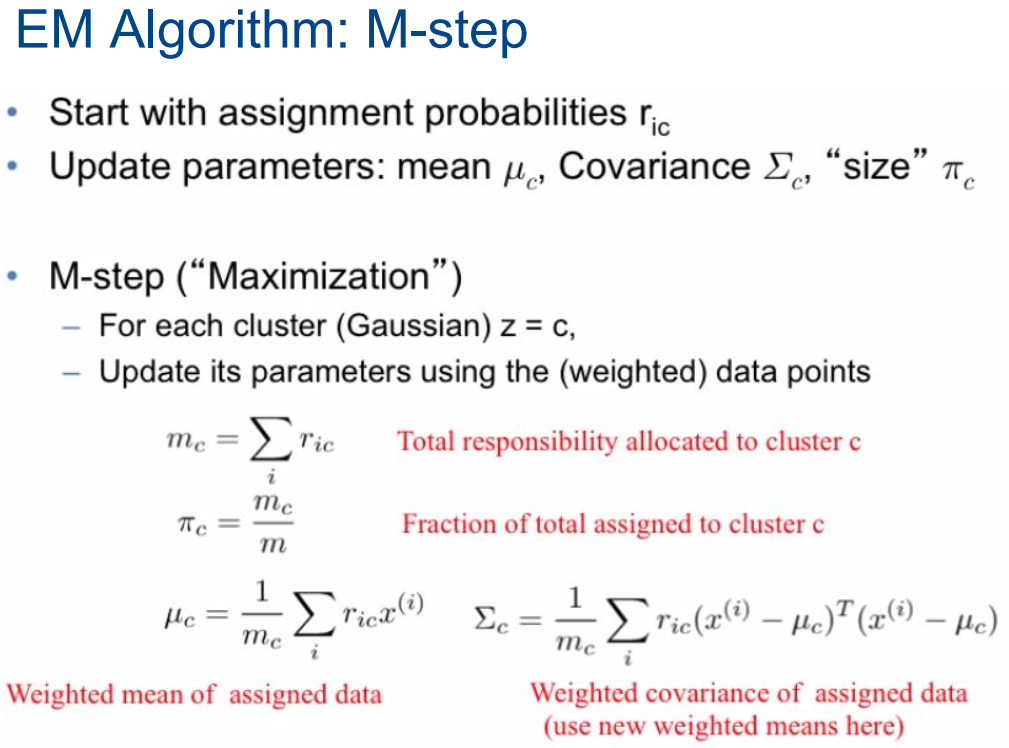 |
| Initial Covariance matrices of clusters are estimated by: 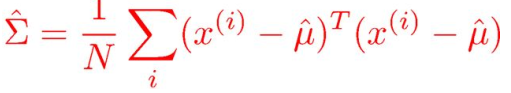 | 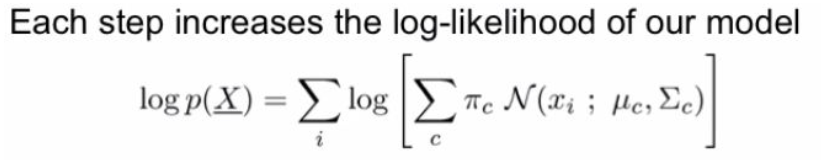 |

In [10]:
def gaussian_mixture(X, cluster_num):
    """
    Estimates model parameters with the EM algorithm and returns them in a tuple.
    Initial parameters are estimated via k-means algorithm and EM algorithm iterates at most 100 times.
    :param X: [numpy.ndarray], nxd matrix where each row represents an instance and each column represents a feature
    :param cluster_num: [int], number of Gaussians (mixture components)
    :return: (<weights>, <means>, <covariance matrices>) tuple
    """
    from sklearn.cluster import KMeans

    instance_num = X.shape[0]  # Number of instances
    dimension_num = X.shape[1]  # Number of dimensions (features)

    # Initializes initial parameters with k-means
    kmeans = KMeans(n_clusters=cluster_num).fit(X)

    # Weights of clusters
    W = [(np.count_nonzero(kmeans.labels_ == c) / instance_num) for c in range(cluster_num)]

    # Means of clusters
    U = [kmeans.cluster_centers_[[c]] for c in range(cluster_num)]

    # Covariance matrices of clusters
    S = [np.zeros((dimension_num, dimension_num)) for _ in range(cluster_num)]
    for c in range(cluster_num):
        for i in range(instance_num):
            S[c] += np.dot((X[[i]] - U[c]).T, X[[i]] - U[c])

        S[c] = S[c] / instance_num

    # EM (Expectation-Maximization) Algorithm starts here

    R = np.zeros((instance_num, cluster_num))  # R[i][c] is the probability that x_i belongs to cluster c.

    likelihood = -np.inf  # The log-likelihood value EM algorithm tries to increase.

    step = 0  # Current step of the iterations of EM algorithm

    while True:
        new_likelihood = 0

        # EM Algorithm: E-Step (with log-likelihood calculation)
        for i in range(instance_num):
            for c in range(cluster_num):
                R[i][c] = W[c] * multivariate_normal_pdf(X[[i]], U[c], S[c])

            total_i = np.sum(R[i])  # SUM_c R[i][c]
            new_likelihood += np.log10(total_i)

            # Normalize values
            for c in range(cluster_num):
                R[i][c] = R[i][c] / total_i

        if (new_likelihood - likelihood) < 0.005:  # Convergence
            break
        else:
            likelihood = new_likelihood

        # EM Algorithm: M-Step
        for c in range(cluster_num):
            m_c = np.sum(R[:, c])

            W[c] = m_c / instance_num

            new_U_c = np.zeros((1, dimension_num))
            for i in range(instance_num):
                new_U_c += R[i][c] * X[[i]]
            U[c] = new_U_c / m_c

            new_S_c = np.zeros((dimension_num, dimension_num))
            for i in range(instance_num):
                new_S_c += R[i][c] * np.dot((X[[i]] - U[c]).T, X[[i]] - U[c])
            S[c] = new_S_c / m_c

        step += 1
        if step > 100:
            break

    return W, U, S

In [11]:
def log_likelihood(X, W, U, S):
    """
    Calculates and returns the log-likelihood value for given parameters. Parameters represent Gaussians.
    :param X: [numpy.ndarray], nxd matrix (sample set)
    :param W: [List of float], weights of clusters (size c)
    :param U: [List of numpy.ndarray], means of clusters (size c)
    :param S: [List of numpy.ndarray], covariance matrices of clusters (size c)
    """
    result = 0
    for i in range(X.shape[0]):  # For each instance
        partial_result = 0
        for c in range(len(W)):
            partial_result += W[c] * multivariate_normal_pdf(X[[i]], U[c], S[c])

        result += np.log10(partial_result)

    return result


def predict_class(x, class_params):
    """
    Returns the predicted class of the given data instance `x`.
    :param x: [numpy.ndarray], 1xd vector of instance
    :param class_params: List of tuples of Gaussian mixture parameters. ith tuple corresponds to class-i
    """
    # List of (<log-likelikehood>, class) pairs
    likelihood_class_tuples = [(log_likelihood(x, *params), cls) for (cls, params) in enumerate(class_params)]
    
    # Sorts by likelihood in decreasing order and returns the corresponding class of the highest likelihood value.
    return sorted(likelihood_class_tuples, reverse=True)[0][1]

In [12]:
K_VALUES = (1, 2, 3)

print("\nTraining in progress ...", end='')

CLASS_K_PARAMS = {}  # Maps classes (int) to { <k-value>: (<gaussian-mixture-paramaters>) } objects.

for cls in CLASSES:
    train_set = np.array([[instance[0], instance[1]] for instance in TRAIN_DATA if instance[2] == cls])

    CLASS_K_PARAMS[cls] = {}

    for k in K_VALUES:
        CLASS_K_PARAMS[cls][k] = gaussian_mixture(train_set, k)  # (<weights>, <means>, <covariance matrices>)
        
print(" DONE.")


Training in progress ... DONE.


In [13]:
print("\nValidation in progress...")

valid_set = np.array([[instance[0], instance[1]] for instance in VALID_DATA])
actual_classes = [instance[2] for instance in VALID_DATA]  # Classes of the validation instances

best_combination = None  # The combination of k values (for classes) that gives the overall least prediction error.
last_prediction_error = 1.0

for cls_0_k in K_VALUES:  # k-value for class 0
    for cls_1_k in K_VALUES:  # k-value for class 1
        for cls_2_k in K_VALUES:  # k-value for class 2
            current_combination = (cls_0_k, cls_1_k, cls_2_k)
            print(f"\t Validating for the combination: {current_combination} ...", end='')

            predicted_classes = [
                predict_class(valid_set[[i]],
                              [CLASS_K_PARAMS[0][cls_0_k], CLASS_K_PARAMS[1][cls_1_k], CLASS_K_PARAMS[2][cls_2_k]])
                for i in range(valid_set.shape[0])  # For each validation instance
            ]

            prediction_error = get_prediction_error(predicted_classes, actual_classes)
            if prediction_error < last_prediction_error:
                best_combination = current_combination
                last_prediction_error = prediction_error

            print(f" Prediction Error = {prediction_error:.5f}")

print(f"\t Best combination: {best_combination}\tPrediction Error = {last_prediction_error:.5f}")


Validation in progress...
	 Validating for the combination: (1, 1, 1) ... Prediction Error = 0.25493
	 Validating for the combination: (1, 1, 2) ... Prediction Error = 0.25576
	 Validating for the combination: (1, 1, 3) ... Prediction Error = 0.25493
	 Validating for the combination: (1, 2, 1) ... Prediction Error = 0.24424
	 Validating for the combination: (1, 2, 2) ... Prediction Error = 0.24507
	 Validating for the combination: (1, 2, 3) ... Prediction Error = 0.24342
	 Validating for the combination: (1, 3, 1) ... Prediction Error = 0.24589
	 Validating for the combination: (1, 3, 2) ... Prediction Error = 0.24507
	 Validating for the combination: (1, 3, 3) ... Prediction Error = 0.24424
	 Validating for the combination: (2, 1, 1) ... Prediction Error = 0.25493
	 Validating for the combination: (2, 1, 2) ... Prediction Error = 0.25576
	 Validating for the combination: (2, 1, 3) ... Prediction Error = 0.25493
	 Validating for the combination: (2, 2, 1) ... Prediction Error = 0.2458

In [14]:
print("\nTesting in progress ...", end='')

test_set = np.array([[instance[0], instance[1]] for instance in TEST_DATA])
actual_classes = [instance[2] for instance in TEST_DATA]  # Classes of the test instances

# List of Gaussian mixture parameters tuples for the best k values for each class.
# ith element corresponds to class-i.
best_parameters = [CLASS_K_PARAMS[cls][best_k] for (cls, best_k) in enumerate(best_combination)]

predicted_classes = [predict_class(test_set[[i]], best_parameters) for i in range(test_set.shape[0])]
prediction_error = get_prediction_error(predicted_classes, actual_classes)

print(" DONE.\n")

print(f"BEST K VALUES:\t CLASS-0: {best_combination[0]}  CLASS-1: {best_combination[1]}  CLASS-2: {best_combination[2]}"
      f"\nPREDICTION ERROR = {prediction_error:.5f}")
print_confusion_matrix(predicted_classes, actual_classes)


Testing in progress ... DONE.

BEST K VALUES:	 CLASS-0: 1  CLASS-1: 2  CLASS-2: 3
PREDICTION ERROR = 0.23710
Confusion Matrix: (First Row/Column: Class 0, Last Row/Column: Class 2)
[[310  93   7]
 [ 44 278  55]
 [  7  65 284]]



## B: K-Nearest Neighbor
Steps:
* Implement k-nearest neighbor. 
* Run it with k=1,10,40. 
* Using test set, Report
    - best k,
    - prediction error for all k’s.
    - confusion matrix for all k’s.

In [15]:
def euclidean_distance(instance1, instance2):
    """
    Returns the Euclidean distance between given instances (`instance1` and `instance2`).
    Expects both parameters to be sequences (e.g. List, Tuple) of the same format.
    """
    distance = sum([(instance1[i] - instance2[i])**2 for i in range(len(instance1))])
    return np.sqrt(distance)


def k_nearest_neighbors(data_set, instance, length, k):
    """
    Returns k nearest neighbors of given `instance` from given `data_set`.
    Expects the instances in `data_set` and `instance` to be in the same form.
    Only the first `length` features (dimensions) of the instances are considered while calculating the distances.
    """
    # Stores (<distance>, <data instance>) pairs for each <data instance> in given `data_set`.
    # <distance> is the Euclidean distance between given `instance` and <data instance>.
    distance_data_instance = []

    for data_instance in data_set:
        distance = euclidean_distance(data_instance[:length], instance[:length])
        distance_data_instance.append((distance, data_instance))

    distance_data_instance.sort()  # Sorts train instances according to the distances in increasing order.

    return [data_instance for (_, data_instance) in distance_data_instance[:k]]

In [16]:
actual_classes = [instance[2] for instance in TEST_DATA]  # Classes of the test instances

best_k_value = 0
last_prediction_error = 1.0

for k in [1, 10, 40]:
    print(f"Calculating for K = {k} ...", end='')
    predicted_classes = []  # Stores the predicted classes of the test instances.

    for test_instance in TEST_DATA:
        class_dict = {}  # Maps classes to the number of instances of that class.

        # First 2 dimensions (x, y) are considered only. (3rd dimension is the class label.)
        for instance in k_nearest_neighbors(TRAIN_DATA, test_instance, 2, k):
            instance_class = instance[-1]  # `instance` is in the form [x, y, class]
            if instance_class in class_dict:
                class_dict[instance_class] += 1
            else:
                class_dict[instance_class] = 1

        # Sorts classes by the number of instances belonging to that class in descending order
        # and selects the class that has the most instances.
        predicted_class = sorted(class_dict.items(), key=lambda x: -x[1])[0][0]  # First [0] gives (<class>, <number>)
        predicted_classes.append(predicted_class)
    
    prediction_error = get_prediction_error(predicted_classes, actual_classes)
    if prediction_error < last_prediction_error:
        last_prediction_error = prediction_error
        best_k_value = k

    print(f" DONE.\nPrediction Error = {prediction_error:.5f}")
    print_confusion_matrix(predicted_classes, actual_classes)

print(f"Best K value = {best_k_value}\n")

Calculating for K = 1 ... DONE.
Prediction Error = 0.30009
Confusion Matrix: (First Row/Column: Class 0, Last Row/Column: Class 2)
[[313  78  19]
 [ 87 200  90]
 [ 15  54 287]]

Calculating for K = 10 ... DONE.
Prediction Error = 0.24759
Confusion Matrix: (First Row/Column: Class 0, Last Row/Column: Class 2)
[[316  85   9]
 [ 55 259  63]
 [  8  63 285]]

Calculating for K = 40 ... DONE.
Prediction Error = 0.24497
Confusion Matrix: (First Row/Column: Class 0, Last Row/Column: Class 2)
[[314  88   8]
 [ 50 266  61]
 [  7  66 283]]

Best K value = 40

